$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n
$$

## Linear Regression

$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.
- $\theta$ is the model's _parameter vector_, containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$.
- $x$ is the instance's _feature vector_, containing $x_0$ to $x_n$, whith $x_0$ always equal to 1.
- $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$.

The MSE of a Linear Regression hypothesis $h_0$ on a training set $X$ is calculated using this equation below:

$$
MSE(X, h_0) = \frac{1}{m}\sum_{i=1}^m (\theta^Tx^{(i)} - y^{(i)})^2
$$

**The Normal Equation**

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

In [19]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

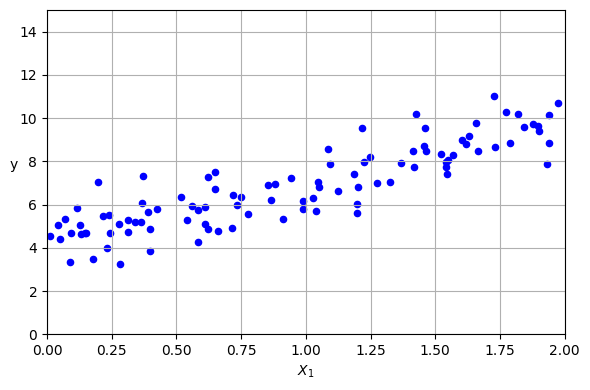

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', s=20)
plt.xlabel('$X_1$')
plt.ylabel('y', rotation=0)
plt.grid()
plt.axis([0, 2, 0, 15])
plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

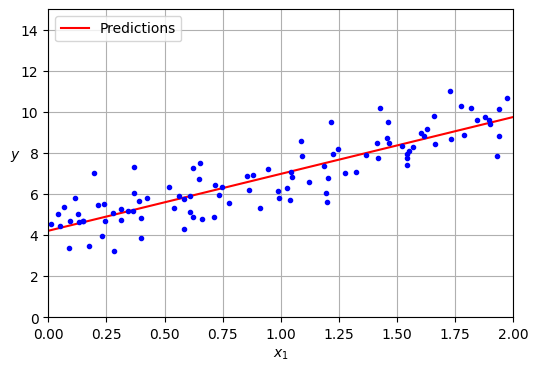

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [25]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

### Batch Gradient Descent

$$
\frac{\partial}{\partial \theta_j}\text{MSE}(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^Tx^{(i)} - y^{(i)}) x_j^{(i)}
$$

$$
\nabla_\theta\text{MSE}(\theta) = \begin{pmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\theta) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n}\text{MSE}(\theta)
\end{pmatrix} =
\frac{2}{m}X^T(X\theta - y)
$$

$$
\theta^{(\text{next step})} = \theta - \eta \nabla_\theta \text{MSE}(\theta)
$$

In [26]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta*gradients

In [27]:
theta

array([[4.21509616],
       [2.77011339]])

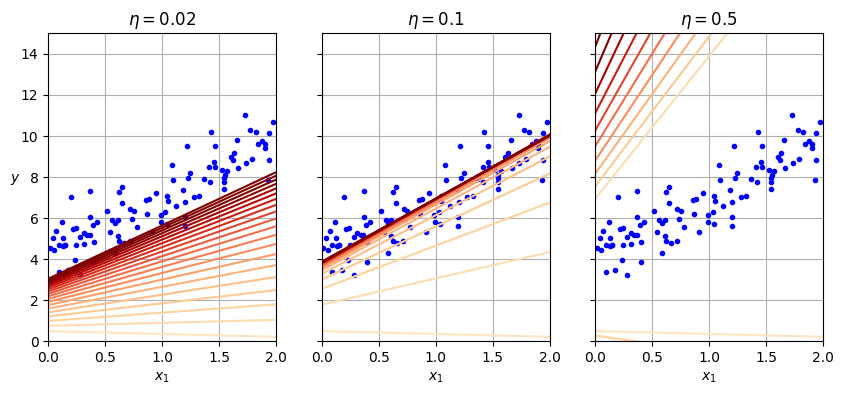

In [28]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

In [29]:
theta_path_sgd = []

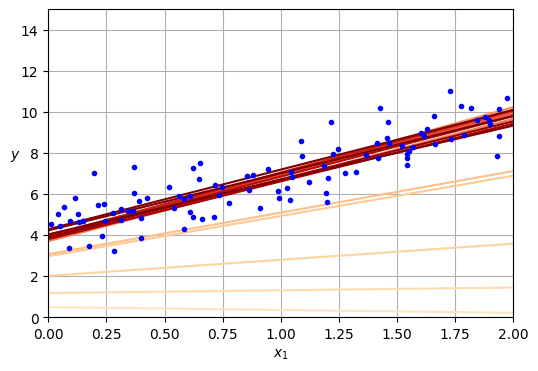

In [30]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

n_shown = 20
plt.figure(figsize=(6, 4))

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [31]:
theta

array([[4.21076011],
       [2.74856079]])

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

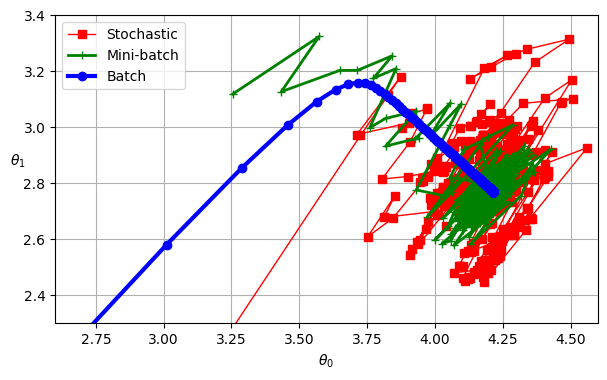

In [35]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label='Batch')
plt.legend(loc='upper left')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

<img src="images/algorithms-comparison.png" />